# Principal Component Analysis (PCA)

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

EJERCICIO 1

In [2]:

#Ejercicio 1:
# Los arrays `u` y `v` representan dos series en función del tiempo `t`.
# 1) Grafique las dos series de datos en una misma imagen y guarde dicha gráfica sn mostrarla en 'serie.pdf'
# 2) Calcule la covarianza entre `u` y `v` e imprima su valor.
# 3) Calcule la varianza de `u` e imprima su valor.
# 4) Imprima un mensaje donde explique qué puede inferir del valor de covarianza obtenido.
import numpy as np
t = np.array([0.,0.1,0.2,0.3,0.4,0.5,0.6, 0.8, 0.9])
u = np.array([-12.,-45.,-6.,-78.,-34.,-22.,10.,-31.,27.])
v = np.array([3.,11.,1.3,37.,11.,6.,-23.,7.,7.])

# 5) Construya un código para obtener la matriz de covarianza de los datos anteriores. (compare su resultado con el de numpy.cov)


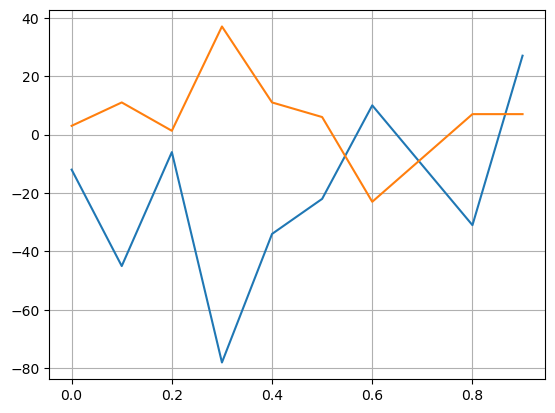

In [3]:
#1)

#plt.plot(u,v)
plt.plot(t,u)
plt.plot(t,v)
plt.grid()
plt.show()


In [4]:
#2

n = len(u)
cov_uv = ((u-u.mean())*(v-v.mean())).sum()/(n-1)
print(cov_uv)

-363.6375


In [5]:
#3

var_u = np.sum((u-u.mean())**2)/(n-1)
print(var_u)

958.1944444444443


In [6]:
#4

L = "El valor de covarianza es negativo, de lo que se puede inferir que estas variables están \n\
altamente anticorrelacionadas (cuando una aumenta, la otra disminuye, y viceversa)."

print(L)

El valor de covarianza es negativo, de lo que se puede inferir que estas variables están 
altamente anticorrelacionadas (cuando una aumenta, la otra disminuye, y viceversa).


In [7]:
#5

def covs_py(L):
  N = len(L)
  n = len(L[1])
  covs = np.zeros((N,N))
  for i in range(N):
    for j in range(i,N):
      covs[i,j] = covs[j,i] = ((((L[i]-L[i].mean())*(L[j]-L[j].mean())))).sum()/(n-1)
  return covs

print(covs_py([u,v]))
print()
covs = np.cov((u,v),ddof=1)
print(covs)

[[ 958.19444444 -363.6375    ]
 [-363.6375      235.085     ]]

[[ 958.19444444 -363.6375    ]
 [-363.6375      235.085     ]]


EJERCICIO 2:

In [8]:
# 6) Repita lo anterior para obtener la matriz de covarianza de los datos del archivo: room-temperature.csv

# 6a) Grafique las 4 series de datos en una misma imagen y guarde dicha gráfica sin mostrarla en 'serieTemp.pdf'
# 7) Calcule los autovalores y los autovectores de la matriz de covarianza de los datos de temperatura.
#(use el paquete: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)

# 8) Lea: https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c
#Organice sus autovalores y autovectores e imprima cuales son sus componentes principales (puede usar paquetes de numpy para encontrar autovalores y autovectores. lea cuidadosamente la documentación.)
# 9) Imprima cuantos componentes principales considera que son necesarios para explicar sus datos.
# 10) Grafique sus datos en el nuevo sistema de referencia (PC1 PC2)
# 11) Comente cuales son las agrupaciones de sus variables originales que aparecen. Mire en su gráfica de los datos originales si el resultado tiene sentido.


In [9]:
data = np.genfromtxt("room-temperature.csv",delimiter=',', skip_header=1,usecols=(1,2,3,4))
data = pd.DataFrame(data)
data

,0,1,2,3
0,295.2,297.0,295.8,296.3
1,296.2,296.4,296.2,296.3
2,297.3,297.5,296.7,297.1
3,295.9,296.7,297.4,297.0
4,297.2,296.5,297.6,297.4
...,...,...,...,...
139,295.8,294.6,294.8,295.7
140,294.8,295.5,294.7,295.6
141,295.9,295.8,295.5,295.2
142,295.1,296.2,296.0,296.1


In [10]:
#6

Z = data.apply(lambda x: ((x-x.mean())/(x.std()))).values

covs = np.cov(Z.T)
print(covs)

[[1.         0.85247599 0.55833731 0.60566994]
 [0.85247599 1.         0.58767585 0.63909555]
 [0.55833731 0.58767585 1.         0.88401916]
 [0.60566994 0.63909555 0.88401916 1.        ]]


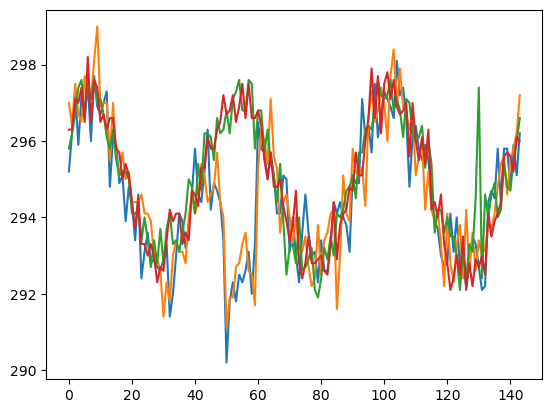

In [11]:
#6a

for i in data.columns:
  plt.plot(data[i].array)

In [12]:
#7
e_values, e_vectors = np.linalg.eig(covs)
print(e_values)
print()
print(e_vectors)

[3.06432038 0.67586856 0.1467444  0.11306666]

[[-0.49127375 -0.5308801  -0.68995833  0.02781941]
 [-0.50211307 -0.47235221  0.71672467 -0.10522166]
 [-0.49486494  0.53968805 -0.09011509 -0.67507391]
 [-0.51150881  0.4514272   0.04628735  0.72967781]]


In [13]:
#8

PCs = Z @ e_vectors

Zp_df = pd.DataFrame(PCs,columns=["PC1", "PC2", "PC3", "PC4"])

Zp_df.head()

,PC1,PC2,PC3,PC4
0,-1.541704,-0.263466,0.695860,0.138553
1,-1.789456,-0.285071,0.002878,0.022204
2,-2.844311,-0.553954,-0.004852,0.115046
3,-2.379014,0.328852,0.205665,-0.201477
4,-2.895338,0.141857,-0.423437,-0.075097


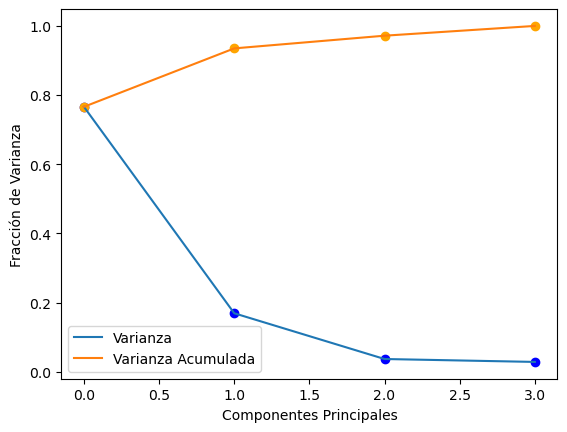


[0.7660801  0.93504724 0.97173334 1.        ]


In [14]:
#9

var_proportion = e_values/sum(e_values)
cumvar_proportion = np.cumsum(e_values)/sum(e_values)
plt.plot(var_proportion, label="Varianza")
plt.scatter(range(len(var_proportion)), var_proportion, color='blue', marker='o')
plt.plot(cumvar_proportion, label="Varianza Acumulada")
plt.scatter(range(len(cumvar_proportion)), cumvar_proportion, color='orange', marker='o')
plt.xlabel("Componentes Principales")
plt.ylabel("Fracción de Varianza")
plt.legend(loc = "best")

plt.show()
print()
print(cumvar_proportion)

L = "Con la varianza acumulada, se observa que tomando dos componentes principales se puede explicar más del \
90% de la varianza"

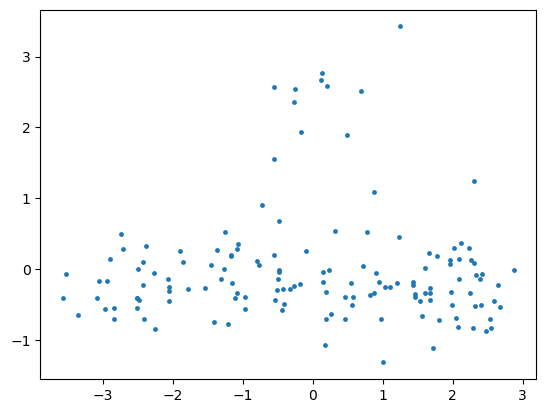

In [15]:
#10

plt.scatter(Zp_df["PC1"],Zp_df["PC2"],s=6)
plt.show()

EJERCICIO 3:

In [16]:
# 12) Repita lo anterior para obtener la matriz de covarianza de los datos del archivo: WCBD.dat

# 13) Calcule los autovalores y los autovectores de la matriz de covarianza de los datos.
#(use el paquete: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)

# 14) Lea: https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c
#Organice sus autovalores y autovectores e imprima cuales son sus componentes principales (puede usar paquetes de numpy para encontrar autovalores y autovectores. lea cuidadosamente la documentación.)

# 15) Imprima cuantos componentes principales considera que son necesarios para explicar sus datos.

# 16) Grafique sus datos en el nuevo sistema de referencia (PC1 PC2)

# 17) Puede ver agrupaciones entre los tumores malignos y benignos?



RECUERDE LOS PASOS:

descargar y limpiar los datos. Ampliarlos (si aplica)

restarles el promedio y normalizar (si aplica)

Calcular la matriz de covarianza de los datos

Encontrar autovalores y autovectores (usar paquete de numpy), y organizarlos (de mayor a menor autovalor)

Mirar los autovalores y decidir cuántos componentes principales (autovectores) mantener.



In [17]:
data2 = np.genfromtxt("WDBC.dat", delimiter=',')
data2 = pd.DataFrame(data2)
data2


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302.0,0.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517.0,0.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903.0,0.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301.0,0.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402.0,0.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424.0,0.0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682.0,0.0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954.0,0.0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241.0,0.0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [18]:
#12

X = data2.drop(labels=[0,1],axis=1)

Z2 = X.apply(lambda x: ((x-x.mean())/(x.std()))).values

covs2 = np.cov(Z2.T)


In [19]:
#13

e_values2, e_vectors2 = np.linalg.eig(covs2)
print(e_values2)

[1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 1.33044823e-04
 7.48803097e-04 1.58933787e-03 6.90046388e-03 8.17763986e-03
 1.54812714e-02 1.80550070e-02 2.43408378e-02 2.74394025e-02
 3.11594025e-02 2.99728939e-02]


In [20]:
#14

Zp2 = Z2 @ e_vectors2

Zp_df2 = pd.DataFrame(Zp2,columns=[f"PC{i}" for i in range(1,31)])

Zp_df2.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,9.184755,1.946870,-1.122179,3.630536,1.194059,1.410184,-2.157472,0.398057,-0.156980,-0.876631,...,0.045608,0.033885,-0.252363,0.201326,-0.150887,0.175102,-0.084444,-0.068789,0.345261,-0.096430
1,2.385703,-3.764859,-0.528827,1.117281,-0.621228,0.028631,-0.013346,-0.240777,-0.711279,1.106022,...,-0.005682,-0.032596,0.181111,0.041093,-0.170360,-0.011280,0.217527,0.094495,-0.114033,0.077259
2,5.728855,-1.074229,-0.551263,0.911281,0.176930,0.540976,0.667579,-0.097288,0.024044,0.453876,...,0.003143,-0.046984,0.049526,-0.004731,0.171008,-0.102671,0.074226,0.060256,-0.204352,-0.310793
3,7.116691,10.266556,-3.229948,0.152413,2.958275,3.050737,-1.428654,-1.058634,-1.404204,-1.115993,...,-0.069234,-0.042447,0.183301,0.274983,0.077428,-0.153295,0.123996,0.203087,-0.464325,-0.433812
4,3.931842,-1.946359,1.388545,2.938054,-0.546267,-1.225416,0.935390,-0.635817,-0.263574,0.377372,...,0.005033,0.034756,0.032140,-0.039220,0.003059,0.005327,-0.139331,0.017634,0.065438,0.116442


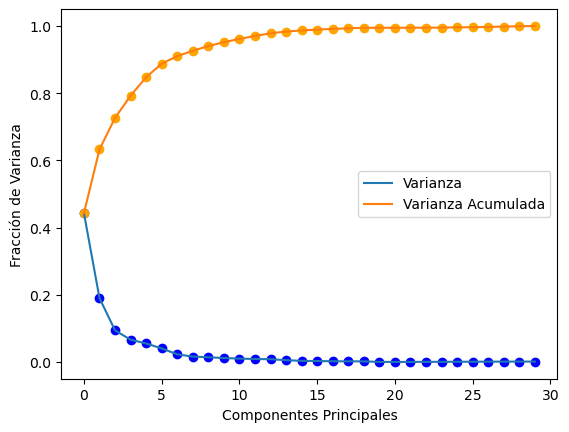


[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99453783 0.99456279 0.99461577 0.99484578 0.99511837
 0.99563442 0.99623625 0.99704761 0.99796226 0.9990009  1.        ]

Se observa que con ocho componentes principales, se explica más del 90% de la varianza.


In [21]:
#15

var_proportion2 = e_values2/sum(e_values2)
cumvar_proportion2 = np.cumsum(e_values2)/sum(e_values2)
plt.plot(var_proportion2, label="Varianza")
plt.scatter(range(len(var_proportion2)), var_proportion2, color='blue', marker='o')
plt.plot(cumvar_proportion2, label="Varianza Acumulada")
plt.scatter(range(len(cumvar_proportion2)), cumvar_proportion2, color='orange', marker='o')
plt.xlabel("Componentes Principales")
plt.ylabel("Fracción de Varianza")
plt.legend(loc = "best")

plt.show()
print()
print(cumvar_proportion2)
print()

L = "Se observa que con ocho componentes principales, se explica más del 90% de la varianza."
print(L)

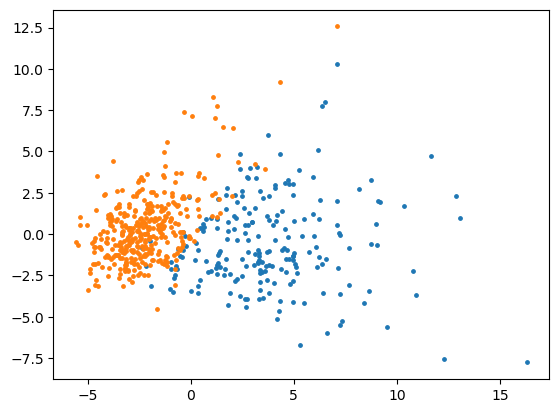

In [22]:
#16

tumor_maligno = Zp_df2[data2[1]==0]
tumor_benigno = Zp_df2[data2[1]==1]


plt.scatter(tumor_maligno["PC1"],tumor_maligno["PC2"],s=6)
plt.scatter(tumor_benigno["PC1"],tumor_benigno["PC2"],s=6)
plt.show()

In [23]:
#17

L = "Los datos para los que el tumor es benigno (en naranja), se encuentran más hacia la izquierda en el plano, \n\
mientras que los datos para los que el tumor es maligno (en azul), se encuentran más hacia la derecha, demostrando \n\
cierta separación evidente en los datos observados desde los componentes principales PC1 y PC2."
print(L)

Los datos para los que el tumor es benigno (en naranja), se encuentran más hacia la izquierda en el plano, 
mientras que los datos para los que el tumor es maligno (en azul), se encuentran más hacia la derecha, demostrando 
cierta separación evidente en los datos observados desde los componentes principales PC1 y PC2.
